<a href="https://colab.research.google.com/github/barauna-lo/Code_Library/blob/main/CyMorphTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Galaxy Zoo 2
https://data.galaxyzoo.org/


In [1]:
!gdown 1pyzriDdrEe0e6_6_Ki-F09EjMAcD3Vej

Downloading...
From (original): https://drive.google.com/uc?id=1pyzriDdrEe0e6_6_Ki-F09EjMAcD3Vej
From (redirected): https://drive.google.com/uc?id=1pyzriDdrEe0e6_6_Ki-F09EjMAcD3Vej&confirm=t&uuid=0c55ab17-8d95-4075-9f0b-76e0f236cf39
To: /content/gz2_hart16.csv.gz
100% 78.5M/78.5M [00:01<00:00, 53.8MB/s]


In [2]:
!gzip -d gz2_hart16.csv.gz

In [3]:
!pip install sep
!pip install -U --pre astroquery[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.6/925.6 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.8 MB/s eta 0:00:00


In [4]:
import sep
import re
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("gz2_hart16.csv")

In [6]:
data.head()

,dr7objid,ra,dec,rastring,decstring,sample,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587732591714893851,179.042984,60.522518,11:56:10.32,+60:31:21.1,original,Sc+t,45,342,0,...,0.450,0.450,0.482646,0,16,16.0,0.400,0.400,0.394506,0
1,588009368545984617,135.084396,52.494240,09:00:20.26,+52:29:39.3,original,Sb+t,42,332,1,...,0.512,0.503,0.504833,0,13,13.0,0.317,0.323,0.322743,0
2,587732484359913515,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,Ei,36,125,28,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
3,587741723357282317,186.251953,28.558598,12:25:00.47,+28:33:31.0,original,Sc+t,28,218,1,...,0.240,0.240,0.241322,0,6,6.0,0.240,0.240,0.239765,0
4,587738410866966577,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,Er,43,151,33,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0


In [7]:
len(data["gz2_class"].unique())

818

In [8]:
def getSpirals(data):
  sa = data[data["gz2_class"].str.contains("Sa")]
  sb = data[data["gz2_class"].str.contains("Sb")]
  sc = data[data["gz2_class"].str.contains("Sc")]
  sba = data[data["gz2_class"].str.contains("SBa")]
  sbb = data[data["gz2_class"].str.contains("SBb")]
  sbc = data[data["gz2_class"].str.contains("SBc")]
  return sa,sb,sc,sba,sbb,sbc
def getEllipticals(data):
  e = data[data["gz2_class"].str.contains("E")]
  return e

In [9]:
sa,sb,sc,sba,sbb,sbc = getSpirals(data)
e = getEllipticals(data)

In [10]:
from astroquery.skyview import SkyView
from astropy import coordinates

# Define the coordinates of the galaxy
ra = 180.0  # Example RA in degrees
dec = 30.0  # Example Dec in degrees
coords = coordinates.SkyCoord(ra=ra, dec=dec, unit='deg')


# Query SkyView for the image
images = SkyView.get_images(position=coords, survey=['SDSSr','SDSSu','SDSSg','SDSSi'])

# Access the FITS image
fits_image = images[2][0]

<ipython-input-11-bdaf921d6761>:3: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(data))


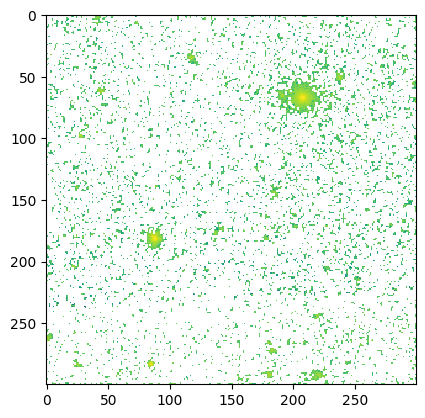

In [11]:
data = fits_image.data
plt.figure()
plt.imshow(np.log(data))
plt.show()

In [12]:
coords = coordinates.SkyCoord(ra=179.042984, dec=60.522518, unit='deg')
images = SkyView.get_images(position=coords, survey=['SDSSr','SDSSu','SDSSg','SDSSi'])

<ipython-input-13-59edbde23e98>:3: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(data))


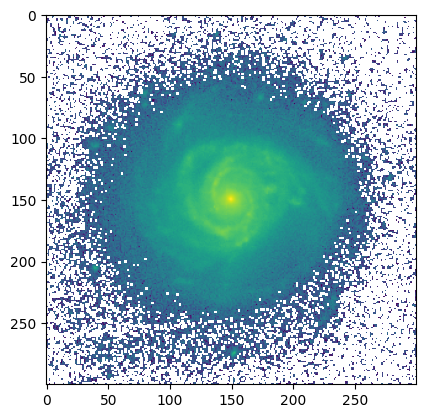

In [13]:
data = images[0][0].data
plt.figure()
plt.imshow(np.log(data))
plt.show()

In [14]:
coords = coordinates.SkyCoord(ra=135.084396, dec=52.494240, unit='deg')
images = SkyView.get_images(position=coords, survey=['SDSSr','SDSSu','SDSSg','SDSSi'])

<ipython-input-15-59edbde23e98>:3: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(data))


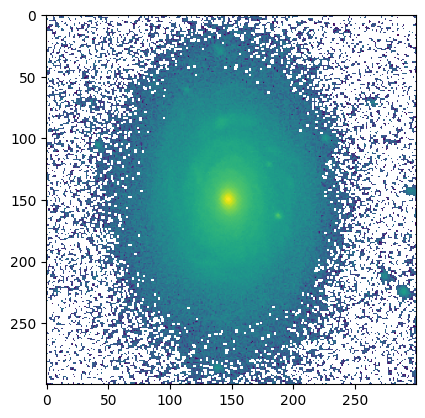

In [15]:
data = images[0][0].data
plt.figure()
plt.imshow(np.log(data))
plt.show()